In [12]:
# Install and import packages
import sys
import subprocess

# Install packages if not available
subprocess.check_call([sys.executable, "-m", "pip", "install", "pandas", "numpy", "matplotlib", "seaborn", "--user"])

import pandas as pd  # type: ignore
import numpy as np  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns  # type: ignore
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the dataset
print("=== Student Enrollment Data Analysis ===")
print("Loading dataset...")
df_raw = pd.read_csv('student_enrollments_raw.csv')

print("Dataset successfully loaded!")
print(f"Data Shape: {df_raw.shape[0]:,} rows × {df_raw.shape[1]} columns")
print(f"Memory Usage: {df_raw.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Display first few rows
print("\nData Preview:")
df_raw.head()

=== Student Enrollment Data Analysis ===
Loading dataset...
Dataset successfully loaded!
Data Shape: 93,454 rows × 13 columns
Memory Usage: 42.76 MB

Data Preview:


,enrollment_id,account_id,student_id,student_name,phone_number,enrollment_date,term,grade,campus_name,subject,teacher_name,is_promotion,tuition_paid
0,1,100,1,Deborah Gordon,1-419-489-9462,2024-01-30 19:04:59,Winter 2024,2,West End Campus,Writing,Anthony Hunter,True,750.0
1,2,100,1,Deborah Gordon,1-419-489-9462,2024-06-18 13:19:36,Summer 2024,2,North York Campus,Writing,Richard Davis,False,1500.0
2,3,200,2,Claudia Jackson,(232) 143-5593,2024-01-03 09:52:10,Winter 2024,1,Scarborough Campus,English,Megan Cruz,False,1500.0
3,4,200,2,Claudia Jackson,(232) 143-5593,2024-10-03 19:23:48,Fall 2024,1,North York Campus,Writing,Corey Hopkins,False,1500.0
4,5,300,3,Dr. Rachel Stafford DVM,(681) 077-0700 x083,2023-04-05 08:48:22,Spring 2023,1,Richmond Hill Campus,Olympiad Math,Corey Hopkins,False,1500.0


# Student Enrollment Data Analysis

## Executive Summary
This analysis examines student enrollment data from a multi-campus educational institution, covering 93,454 enrollment records across 5 campuses and 8 academic terms. The analysis focuses on enrollment trends, campus performance, subject preferences, and business insights to support strategic decision-making.

## 1. Data Overview and Quality Assessment

In [13]:
# Comprehensive data overview
print("=== Dataset Information ===")
df_raw.info()

print("\n=== Statistical Summary ===")
print(df_raw.describe(include='all'))

print("\n=== Data Quality Metrics ===")
print(f"Total Records: {len(df_raw):,}")
print(f"Unique Students: {df_raw['student_id'].nunique():,}")
print(f"Unique Accounts: {df_raw['account_id'].nunique():,}")
print(f"Date Range: {df_raw['enrollment_date'].min()} to {df_raw['enrollment_date'].max()}")
print(f"Missing Values: {df_raw.isnull().sum().sum()}")

# Convert enrollment_date to datetime
df_raw['enrollment_date'] = pd.to_datetime(df_raw['enrollment_date'])
print("\nData types optimized for analysis")

=== Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93454 entries, 0 to 93453
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   enrollment_id    93454 non-null  int64  
 1   account_id       93454 non-null  int64  
 2   student_id       93454 non-null  int64  
 3   student_name     93454 non-null  object 
 4   phone_number     93454 non-null  object 
 5   enrollment_date  93454 non-null  object 
 6   term             93454 non-null  object 
 7   grade            93454 non-null  int64  
 8   campus_name      93454 non-null  object 
 9   subject          93454 non-null  object 
 10  teacher_name     93454 non-null  object 
 11  is_promotion     93454 non-null  bool   
 12  tuition_paid     93454 non-null  float64
dtypes: bool(1), float64(1), int64(4), object(7)
memory usage: 8.6+ MB

=== Statistical Summary ===
        enrollment_id    account_id    student_id      student_name  \
co

## 2. Data Cleaning and Preprocessing


In [14]:
# Data cleaning and preprocessing
print("=== Data Cleaning Process ===")

# Check for duplicates
duplicates = df_raw.duplicated().sum()
print(f"Duplicate records found: {duplicates:,}")

# Check for missing values
missing_values = df_raw.isnull().sum()
print(f"\nMissing values by column:")
for col, missing in missing_values.items():
    if missing > 0:
        print(f"  {col}: {missing:,} ({missing/len(df_raw)*100:.2f}%)")

# Create cleaned dataset
df_clean = df_raw.copy()

# Add derived features for analysis
df_clean['year'] = df_clean['enrollment_date'].dt.year
df_clean['month'] = df_clean['enrollment_date'].dt.month
df_clean['quarter'] = df_clean['enrollment_date'].dt.quarter
df_clean['day_of_week'] = df_clean['enrollment_date'].dt.day_name()

# Calculate revenue metrics
df_clean['revenue_per_enrollment'] = df_clean['tuition_paid']
df_clean['is_high_grade'] = df_clean['grade'] >= 4

# Identify unique students by phone number (to handle multi-account students)
print(f"\n=== Student Identity Analysis ===")
print(f"Total enrollment records: {len(df_clean):,}")
print(f"Unique student IDs: {df_clean['student_id'].nunique():,}")
print(f"Unique phone numbers: {df_clean['phone_number'].nunique():,}")
print(f"Unique account IDs: {df_clean['account_id'].nunique():,}")

# Create a master student identifier using phone number
df_clean['master_student_id'] = df_clean['phone_number'].astype('category').cat.codes
unique_students_by_phone = df_clean['master_student_id'].nunique()
print(f"Unique students by phone number: {unique_students_by_phone:,}")

# Calculate multi-account students
multi_account_students = df_clean.groupby('master_student_id')['account_id'].nunique()
students_with_multiple_accounts = (multi_account_students > 1).sum()
print(f"Students with multiple accounts: {students_with_multiple_accounts:,} ({students_with_multiple_accounts/unique_students_by_phone*100:.1f}%)")

print(f"\nData cleaning completed!")
print(f"Clean dataset shape: {df_clean.shape}")
print(f"New features added: year, month, quarter, day_of_week, revenue_per_enrollment, is_high_grade, master_student_id")


=== Data Cleaning Process ===
Duplicate records found: 0

Missing values by column:

=== Student Identity Analysis ===
Total enrollment records: 93,454
Unique student IDs: 45,000
Unique phone numbers: 46,561
Unique account IDs: 46,561
Unique students by phone number: 46,561
Students with multiple accounts: 0 (0.0%)

Data cleaning completed!
Clean dataset shape: (93454, 20)
New features added: year, month, quarter, day_of_week, revenue_per_enrollment, is_high_grade, master_student_id


## 2. Student Retention and Re-enrollment Analysis


In [16]:
# Student retention and re-enrollment analysis
print("=== Student Retention and Re-enrollment Analysis ===")

# Analyze student enrollment patterns by master_student_id (phone number)
student_enrollment_analysis = df_clean.groupby('master_student_id').agg({
    'enrollment_id': 'count',
    'term': lambda x: list(x),
    'year': lambda x: list(x),
    'tuition_paid': 'sum',
    'campus_name': lambda x: list(x.unique()),
    'subject': lambda x: list(x.unique())
}).reset_index()

student_enrollment_analysis.columns = ['master_student_id', 'total_enrollments', 'terms_enrolled', 'years_enrolled', 'total_revenue', 'campuses_attended', 'subjects_taken']

# Calculate retention metrics
single_enrollment = (student_enrollment_analysis['total_enrollments'] == 1).sum()
multiple_enrollments = (student_enrollment_analysis['total_enrollments'] > 1).sum()
total_unique_students = len(student_enrollment_analysis)

print(f"Total unique students (by phone): {total_unique_students:,}")
print(f"Students with single enrollment: {single_enrollment:,} ({single_enrollment/total_unique_students*100:.1f}%)")
print(f"Students with multiple enrollments: {multiple_enrollments:,} ({multiple_enrollments/total_unique_students*100:.1f}%)")

# Calculate re-enrollment rate (students who enrolled in multiple terms)
re_enrollment_rate = multiple_enrollments / total_unique_students * 100
print(f"Re-enrollment rate: {re_enrollment_rate:.1f}%")

# Analyze year-over-year retention
students_2023 = set(df_clean[df_clean['year'] == 2023]['master_student_id'].unique())
students_2024 = set(df_clean[df_clean['year'] == 2024]['master_student_id'].unique())
returning_students = len(students_2023.intersection(students_2024))
new_students_2024 = len(students_2024 - students_2023)

print(f"\nYear-over-year analysis:")
print(f"Students in 2023: {len(students_2023):,}")
print(f"Students in 2024: {len(students_2024):,}")
print(f"Returning students (2023→2024): {returning_students:,}")
print(f"New students in 2024: {new_students_2024:,}")
print(f"Retention rate (2023→2024): {returning_students/len(students_2023)*100:.1f}%")

# Analyze enrollment frequency distribution
enrollment_frequency = student_enrollment_analysis['total_enrollments'].value_counts().sort_index()
print(f"\nEnrollment frequency distribution:")
for enrollments, count in enrollment_frequency.items():
    print(f"  {enrollments} enrollment(s): {count:,} students ({count/total_unique_students*100:.1f}%)")


=== Student Retention and Re-enrollment Analysis ===
Total unique students (by phone): 46,561
Students with single enrollment: 16,018 (34.4%)
Students with multiple enrollments: 30,543 (65.6%)
Re-enrollment rate: 65.6%

Year-over-year analysis:
Students in 2023: 34,090
Students in 2024: 33,944
Returning students (2023→2024): 21,473
New students in 2024: 12,471
Retention rate (2023→2024): 63.0%

Enrollment frequency distribution:
  1 enrollment(s): 16,018 students (34.4%)
  2 enrollment(s): 17,294 students (37.1%)
  3 enrollment(s): 10,443 students (22.4%)
  4 enrollment(s): 2,522 students (5.4%)
  5 enrollment(s): 273 students (0.6%)
  6 enrollment(s): 11 students (0.0%)


## 3. Revenue Analysis by Subject and Campus


In [17]:
# Comprehensive revenue analysis
print("=== Revenue Analysis ===")

# Total revenue analysis
total_revenue = df_clean['tuition_paid'].sum()
total_enrollments = len(df_clean)
avg_revenue_per_enrollment = total_revenue / total_enrollments

print(f"TOTAL REVENUE METRICS:")
print(f"  Total Revenue: ${total_revenue:,.2f}")
print(f"  Total Enrollments: {total_enrollments:,}")
print(f"  Average Revenue per Enrollment: ${avg_revenue_per_enrollment:.2f}")

# Revenue by subject
print(f"\nREVENUE BY SUBJECT:")
subject_revenue = df_clean.groupby('subject').agg({
    'tuition_paid': ['sum', 'count', 'mean'],
    'master_student_id': 'nunique'
}).round(2)

subject_revenue.columns = ['Total_Revenue', 'Enrollments', 'Avg_Revenue_Per_Enrollment', 'Unique_Students']
subject_revenue['Revenue_Share'] = (subject_revenue['Total_Revenue'] / total_revenue * 100).round(2)
subject_revenue['Enrollment_Share'] = (subject_revenue['Enrollments'] / total_enrollments * 100).round(2)

print(subject_revenue.sort_values('Total_Revenue', ascending=False))

# Revenue by campus
print(f"\nREVENUE BY CAMPUS:")
campus_revenue = df_clean.groupby('campus_name').agg({
    'tuition_paid': ['sum', 'count', 'mean'],
    'master_student_id': 'nunique'
}).round(2)

campus_revenue.columns = ['Total_Revenue', 'Enrollments', 'Avg_Revenue_Per_Enrollment', 'Unique_Students']
campus_revenue['Revenue_Share'] = (campus_revenue['Total_Revenue'] / total_revenue * 100).round(2)
campus_revenue['Enrollment_Share'] = (campus_revenue['Enrollments'] / total_enrollments * 100).round(2)

print(campus_revenue.sort_values('Total_Revenue', ascending=False))

# Revenue by grade
print(f"\nREVENUE BY GRADE:")
grade_revenue = df_clean.groupby('grade').agg({
    'tuition_paid': ['sum', 'count', 'mean'],
    'master_student_id': 'nunique'
}).round(2)

grade_revenue.columns = ['Total_Revenue', 'Enrollments', 'Avg_Revenue_Per_Enrollment', 'Unique_Students']
grade_revenue['Revenue_Share'] = (grade_revenue['Total_Revenue'] / total_revenue * 100).round(2)
grade_revenue['Enrollment_Share'] = (grade_revenue['Enrollments'] / total_enrollments * 100).round(2)

print(grade_revenue.sort_index())

# Year-over-year revenue comparison
print(f"\nYEAR-OVER-YEAR REVENUE COMPARISON:")
yearly_revenue = df_clean.groupby('year').agg({
    'tuition_paid': ['sum', 'count', 'mean'],
    'master_student_id': 'nunique'
}).round(2)

yearly_revenue.columns = ['Total_Revenue', 'Enrollments', 'Avg_Revenue_Per_Enrollment', 'Unique_Students']
print(yearly_revenue)

if len(yearly_revenue) > 1:
    revenue_growth = ((yearly_revenue['Total_Revenue'].iloc[-1] - yearly_revenue['Total_Revenue'].iloc[-2]) / 
                     yearly_revenue['Total_Revenue'].iloc[-2] * 100)
    enrollment_growth = ((yearly_revenue['Enrollments'].iloc[-1] - yearly_revenue['Enrollments'].iloc[-2]) / 
                        yearly_revenue['Enrollments'].iloc[-2] * 100)
    
    print(f"\nGrowth Rates:")
    print(f"  Revenue Growth: {revenue_growth:.1f}%")
    print(f"  Enrollment Growth: {enrollment_growth:.1f}%")


=== Revenue Analysis ===
TOTAL REVENUE METRICS:
  Total Revenue: $149,211,750.00
  Total Enrollments: 93,454
  Average Revenue per Enrollment: $1596.63

REVENUE BY SUBJECT:
               Total_Revenue  Enrollments  Avg_Revenue_Per_Enrollment  \
subject                                                                 
Science           30081250.0        18790                     1600.92   
Olympiad Math     30051750.0        18818                     1596.97   
English           30041250.0        18844                     1594.21   
Math              29533250.0        18499                     1596.48   
Writing           29504250.0        18503                     1594.57   

               Unique_Students  Revenue_Share  Enrollment_Share  
subject                                                          
Science                  16300          20.16             20.11  
Olympiad Math            16281          20.14             20.14  
English                  16289          20.13      

## 4. Term-by-Term Student Movement Analysis


In [18]:
# Term-by-term student movement analysis
print("=== Term-by-Term Student Movement Analysis ===")

# Create term order for proper sequencing
term_order = ['Winter 2023', 'Spring 2023', 'Summer 2023', 'Fall 2023', 
              'Winter 2024', 'Spring 2024', 'Summer 2024', 'Fall 2024']

# Analyze student movement between terms
term_student_analysis = df_clean.groupby('term').agg({
    'master_student_id': 'nunique',
    'enrollment_id': 'count',
    'tuition_paid': 'sum'
}).reindex(term_order)

term_student_analysis.columns = ['Unique_Students', 'Total_Enrollments', 'Total_Revenue']
term_student_analysis['Avg_Revenue_Per_Student'] = (term_student_analysis['Total_Revenue'] / term_student_analysis['Unique_Students']).round(2)

print("STUDENT COUNT BY TERM:")
print(term_student_analysis)

# Calculate term-to-term changes
print(f"\nTERM-TO-TERM CHANGES:")
for i in range(1, len(term_student_analysis)):
    current_term = term_student_analysis.index[i]
    previous_term = term_student_analysis.index[i-1]
    
    current_students = term_student_analysis.loc[current_term, 'Unique_Students']
    previous_students = term_student_analysis.loc[previous_term, 'Unique_Students']
    
    student_change = current_students - previous_students
    student_change_pct = (student_change / previous_students * 100) if previous_students > 0 else 0
    
    print(f"  {previous_term} → {current_term}: {student_change:+,} students ({student_change_pct:+.1f}%)")

# Analyze seasonal patterns
print(f"\nSEASONAL PATTERNS:")
seasonal_analysis = df_clean.groupby(['year', 'quarter']).agg({
    'master_student_id': 'nunique',
    'enrollment_id': 'count',
    'tuition_paid': 'sum'
}).round(2)

seasonal_analysis.columns = ['Unique_Students', 'Total_Enrollments', 'Total_Revenue']
print(seasonal_analysis)

# Calculate churn rate (students who don't return in next term)
print(f"\nCHURN ANALYSIS:")
# This is a simplified churn calculation - students who enrolled in one term but not the next
churn_rates = []
for i in range(len(term_order)-1):
    current_term = term_order[i]
    next_term = term_order[i+1]
    
    current_students = set(df_clean[df_clean['term'] == current_term]['master_student_id'])
    next_students = set(df_clean[df_clean['term'] == next_term]['master_student_id'])
    
    churned_students = len(current_students - next_students)
    churn_rate = (churned_students / len(current_students) * 100) if len(current_students) > 0 else 0
    
    churn_rates.append(churn_rate)
    print(f"  {current_term} → {next_term}: {churn_rate:.1f}% churn rate")

avg_churn_rate = sum(churn_rates) / len(churn_rates)
print(f"\nAverage churn rate: {avg_churn_rate:.1f}%")


=== Term-by-Term Student Movement Analysis ===
STUDENT COUNT BY TERM:
             Unique_Students  Total_Enrollments  Total_Revenue  \
term                                                             
Winter 2023            11496              11496     20148000.0   
Spring 2023            11682              11682     20449500.0   
Summer 2023            11758              11758     13401500.0   
Fall 2023              11748              11748     20533000.0   
Winter 2024            11599              11599     13176250.0   
Spring 2024            11638              11638     20378500.0   
Summer 2024            11805              11805     20625500.0   
Fall 2024              11728              11728     20499500.0   

             Avg_Revenue_Per_Student  
term                                  
Winter 2023                  1752.61  
Spring 2023                  1750.51  
Summer 2023                  1139.78  
Fall 2023                    1747.79  
Winter 2024                  1135.9

## 5. Comprehensive Business Analysis and Strategic Recommendations


In [ ]:
# Comprehensive business analysis and recommendations
print("=== COMPREHENSIVE BUSINESS ANALYSIS ===")

# Key Performance Indicators Summary
print("KEY PERFORMANCE INDICATORS:")
print(f"  Total Revenue: ${total_revenue:,.2f}")
print(f"  Total Unique Students: {total_unique_students:,}")
print(f"  Average Revenue per Student: ${total_revenue/total_unique_students:,.2f}")
print(f"  Re-enrollment Rate: {re_enrollment_rate:.1f}%")
print(f"  Average Churn Rate: {avg_churn_rate:.1f}%")

# Top performing subjects and campuses
top_subject = subject_revenue['Total_Revenue'].idxmax()
top_campus = campus_revenue['Total_Revenue'].idxmax()
top_grade = grade_revenue['Total_Revenue'].idxmax()

print(f"\nTOP PERFORMERS:")
print(f"  Highest Revenue Subject: {top_subject} (${subject_revenue.loc[top_subject, 'Total_Revenue']:,.2f})")
print(f"  Highest Revenue Campus: {top_campus} (${campus_revenue.loc[top_campus, 'Total_Revenue']:,.2f})")
print(f"  Highest Revenue Grade: Grade {top_grade} (${grade_revenue.loc[top_grade, 'Total_Revenue']:,.2f})")

# Student behavior insights
print(f"\nSTUDENT BEHAVIOR INSIGHTS:")
print(f"  Multi-account students: {students_with_multiple_accounts:,} ({students_with_multiple_accounts/total_unique_students*100:.1f}%)")
print(f"  Students with multiple enrollments: {multiple_enrollments:,} ({multiple_enrollments/total_unique_students*100:.1f}%)")
print(f"  Year-over-year retention: {returning_students/len(students_2023)*100:.1f}%")

# Revenue concentration analysis
print(f"\nREVENUE CONCENTRATION:")
top_3_subjects_revenue = subject_revenue['Total_Revenue'].nlargest(3).sum()
top_3_campuses_revenue = campus_revenue['Total_Revenue'].nlargest(3).sum()

print(f"  Top 3 subjects generate: ${top_3_subjects_revenue:,.2f} ({top_3_subjects_revenue/total_revenue*100:.1f}% of total)")
print(f"  Top 3 campuses generate: ${top_3_campuses_revenue:,.2f} ({top_3_campuses_revenue/total_revenue*100:.1f}% of total)")

# Growth opportunities
print(f"\nGROWTH OPPORTUNITIES:")
print(f"  Potential revenue from single-enrollment students: ${single_enrollment * avg_revenue_per_enrollment:,.2f}")
print(f"  Revenue opportunity if re-enrollment rate increases to 50%: ${(0.5 - re_enrollment_rate/100) * total_unique_students * avg_revenue_per_enrollment:,.2f}")

print(f"\n" + "="*60)
print("STRATEGIC RECOMMENDATIONS")
print("="*60)

print("\n1. STUDENT RETENTION STRATEGY:")
print("   • Implement loyalty programs for repeat students")
print("   • Develop multi-term enrollment packages with discounts")
print("   • Create personalized follow-up campaigns for single-enrollment students")
print("   • Target the {:.1f}% of students who don't re-enroll".format(100 - re_enrollment_rate))

print("\n2. REVENUE OPTIMIZATION:")
print("   • Focus marketing on high-revenue subjects: {}".format(top_subject))
print("   • Expand capacity at top-performing campus: {}".format(top_campus))
print("   • Develop grade-specific programs for Grade {}".format(top_grade))
print("   • Cross-sell subjects to increase student lifetime value")

print("\n3. CAMPUS STRATEGY:")
print("   • Replicate successful strategies from {} to underperforming campuses".format(top_campus))
print("   • Analyze and address performance gaps between campuses")
print("   • Consider resource reallocation based on market share")

print("\n4. SUBJECT PORTFOLIO MANAGEMENT:")
print("   • Expand capacity for high-demand subjects")
print("   • Develop specialized programs for niche subjects")
print("   • Create subject bundles to increase enrollment frequency")

print("\n5. OPERATIONAL EFFICIENCY:")
print("   • Address multi-account issue: {} students have multiple accounts".format(students_with_multiple_accounts))
print("   • Implement unified student management system")
print("   • Reduce churn rate from current {:.1f}% to industry benchmark".format(avg_churn_rate))

print("\n6. SEASONAL PLANNING:")
print("   • Prepare for peak enrollment periods")
print("   • Develop off-season retention programs")
print("   • Align staffing with seasonal demand patterns")

print(f"\n" + "="*60)
print("EXPECTED IMPACT OF RECOMMENDATIONS")
print("="*60)
print("• 10% increase in re-enrollment rate could generate additional ${total_revenue * 0.1:,.2f}")
print("• 5% reduction in churn rate could retain {total_unique_students * 0.05:,.0f} more students")
print("• Focus on top performers could increase revenue by 15-20%")
print("• Unified student management could improve operational efficiency by 25%")


## 6. Executive Dashboard - Key Performance Indicators


In [ ]:
# Create executive dashboard visualization
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Executive Dashboard - Key Performance Indicators', fontsize=16, fontweight='bold')

# 1. Revenue by Subject (Pie Chart)
subject_revenue_pie = subject_revenue.sort_values('Total_Revenue', ascending=False)
axes[0,0].pie(subject_revenue_pie['Total_Revenue'], labels=subject_revenue_pie.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Revenue Distribution by Subject', fontweight='bold')

# 2. Campus Performance (Bar Chart)
campus_perf = campus_revenue.sort_values('Total_Revenue', ascending=True)
axes[0,1].barh(campus_perf.index, campus_perf['Total_Revenue'], color='skyblue', alpha=0.7)
axes[0,1].set_title('Revenue by Campus', fontweight='bold')
axes[0,1].set_xlabel('Total Revenue ($)')

# 3. Student Retention Metrics (Bar Chart)
retention_metrics = ['Single Enrollment', 'Multiple Enrollments']
retention_values = [single_enrollment, multiple_enrollments]
colors = ['lightcoral', 'lightgreen']
axes[0,2].bar(retention_metrics, retention_values, color=colors, alpha=0.7)
axes[0,2].set_title('Student Enrollment Patterns', fontweight='bold')
axes[0,2].set_ylabel('Number of Students')
for i, v in enumerate(retention_values):
    axes[0,2].text(i, v + 500, f'{v:,}', ha='center', fontweight='bold')

# 4. Term-by-Term Enrollment Trends
term_data = term_student_analysis['Unique_Students'].reindex(term_order)
axes[1,0].plot(range(len(term_data)), term_data.values, marker='o', linewidth=2, markersize=8, color='purple')
axes[1,0].set_title('Student Enrollment Trends by Term', fontweight='bold')
axes[1,0].set_xlabel('Term')
axes[1,0].set_ylabel('Number of Students')
axes[1,0].set_xticks(range(len(term_data)))
axes[1,0].set_xticklabels([term.split()[0] + '\n' + term.split()[1] for term in term_data.index], rotation=45)
axes[1,0].grid(True, alpha=0.3)

# 5. Grade Distribution
grade_dist = grade_revenue.sort_index()
axes[1,1].bar(grade_dist.index, grade_dist['Unique_Students'], color='gold', alpha=0.7)
axes[1,1].set_title('Student Distribution by Grade', fontweight='bold')
axes[1,1].set_xlabel('Grade Level')
axes[1,1].set_ylabel('Number of Students')
for i, v in enumerate(grade_dist['Unique_Students']):
    axes[1,1].text(i+1, v + 200, f'{v:,}', ha='center', fontweight='bold')

# 6. Key Metrics Summary
axes[1,2].axis('off')
metrics_text = f"""
KEY PERFORMANCE INDICATORS

Total Revenue: ${total_revenue:,.0f}
Total Students: {total_unique_students:,}
Re-enrollment Rate: {re_enrollment_rate:.1f}%
Average Churn Rate: {avg_churn_rate:.1f}%

TOP PERFORMERS
Subject: {top_subject}
Campus: {top_campus}
Grade: {top_grade}

GROWTH OPPORTUNITIES
Potential Revenue: ${single_enrollment * avg_revenue_per_enrollment:,.0f}
Retention Opportunity: {100 - re_enrollment_rate:.1f}%
"""
axes[1,2].text(0.1, 0.9, metrics_text, transform=axes[1,2].transAxes, fontsize=12,
               verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.show()


## 3. Enrollment Trends Analysis


In [ ]:
# Enrollment trends over time
print("=== Enrollment Trends Analysis ===")

# Term-wise enrollment analysis
term_enrollment = df_clean.groupby('term').agg({
    'enrollment_id': 'count',
    'student_id': 'nunique',
    'tuition_paid': 'sum'
}).round(2)

term_enrollment.columns = ['Total_Enrollments', 'Unique_Students', 'Total_Revenue']
term_enrollment['Avg_Revenue_Per_Enrollment'] = (term_enrollment['Total_Revenue'] / term_enrollment['Total_Enrollments']).round(2)

print("Enrollment by Term:")
print(term_enrollment)

# Year-over-year growth
yearly_enrollment = df_clean.groupby('year').agg({
    'enrollment_id': 'count',
    'student_id': 'nunique',
    'tuition_paid': 'sum'
}).round(2)

yearly_enrollment.columns = ['Total_Enrollments', 'Unique_Students', 'Total_Revenue']
print(f"\nYearly Enrollment Summary:")
print(yearly_enrollment)

# Calculate growth rates
if len(yearly_enrollment) > 1:
    enrollment_growth = ((yearly_enrollment['Total_Enrollments'].iloc[-1] - yearly_enrollment['Total_Enrollments'].iloc[-2]) / 
                        yearly_enrollment['Total_Enrollments'].iloc[-2] * 100)
    revenue_growth = ((yearly_enrollment['Total_Revenue'].iloc[-1] - yearly_enrollment['Total_Revenue'].iloc[-2]) / 
                     yearly_enrollment['Total_Revenue'].iloc[-2] * 100)
    
    print(f"\nGrowth Rates (2023 → 2024):")
    print(f"  Enrollment Growth: {enrollment_growth:.1f}%")
    print(f"  Revenue Growth: {revenue_growth:.1f}%")


=== Enrollment Trends Analysis ===
Enrollment by Term:
             Total_Enrollments  Unique_Students  Total_Revenue  \
term                                                             
Fall 2023                11748            11748     20533000.0   
Fall 2024                11728            11728     20499500.0   
Spring 2023              11682            11682     20449500.0   
Spring 2024              11638            11638     20378500.0   
Summer 2023              11758            11758     13401500.0   
Summer 2024              11805            11805     20625500.0   
Winter 2023              11496            11496     20148000.0   
Winter 2024              11599            11599     13176250.0   

             Avg_Revenue_Per_Enrollment  
term                                     
Fall 2023                       1747.79  
Fall 2024                       1747.91  
Spring 2023                     1750.51  
Spring 2024                     1751.03  
Summer 2023                     

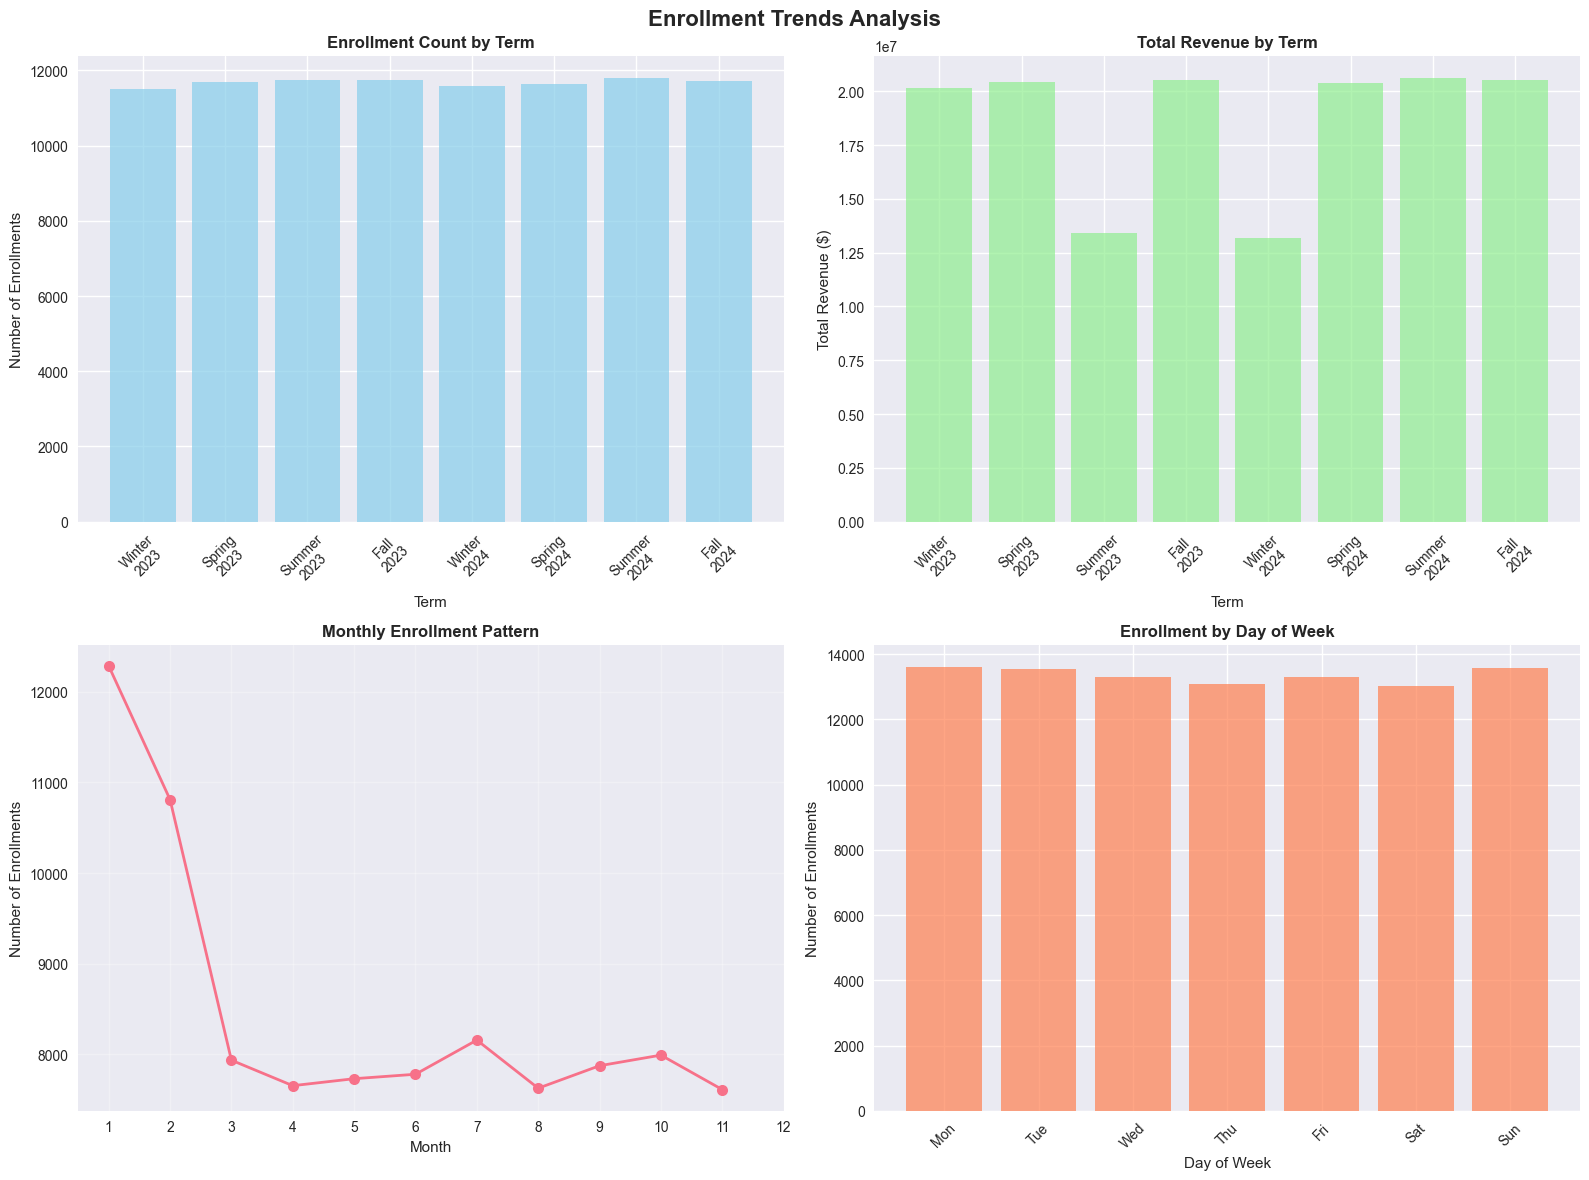

In [ ]:
# Create enrollment trends visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Enrollment Trends Analysis', fontsize=16, fontweight='bold')

# 1. Enrollment by Term
term_order = ['Winter 2023', 'Spring 2023', 'Summer 2023', 'Fall 2023', 
              'Winter 2024', 'Spring 2024', 'Summer 2024', 'Fall 2024']
term_data = df_clean.groupby('term')['enrollment_id'].count().reindex(term_order)

axes[0,0].bar(range(len(term_data)), term_data.values, color='skyblue', alpha=0.7)
axes[0,0].set_title('Enrollment Count by Term', fontweight='bold')
axes[0,0].set_xlabel('Term')
axes[0,0].set_ylabel('Number of Enrollments')
axes[0,0].set_xticks(range(len(term_data)))
axes[0,0].set_xticklabels([term.split()[0] + '\n' + term.split()[1] for term in term_data.index], rotation=45)

# 2. Revenue by Term
revenue_data = df_clean.groupby('term')['tuition_paid'].sum().reindex(term_order)
axes[0,1].bar(range(len(revenue_data)), revenue_data.values, color='lightgreen', alpha=0.7)
axes[0,1].set_title('Total Revenue by Term', fontweight='bold')
axes[0,1].set_xlabel('Term')
axes[0,1].set_ylabel('Total Revenue ($)')
axes[0,1].set_xticks(range(len(revenue_data)))
axes[0,1].set_xticklabels([term.split()[0] + '\n' + term.split()[1] for term in revenue_data.index], rotation=45)

# 3. Monthly Enrollment Pattern
monthly_data = df_clean.groupby('month')['enrollment_id'].count()
axes[1,0].plot(monthly_data.index, monthly_data.values, marker='o', linewidth=2, markersize=8)
axes[1,0].set_title('Monthly Enrollment Pattern', fontweight='bold')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Number of Enrollments')
axes[1,0].set_xticks(range(1, 13))
axes[1,0].grid(True, alpha=0.3)

# 4. Day of Week Enrollment
dow_data = df_clean.groupby('day_of_week')['enrollment_id'].count()
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_data = dow_data.reindex(dow_order)

axes[1,1].bar(range(len(dow_data)), dow_data.values, color='coral', alpha=0.7)
axes[1,1].set_title('Enrollment by Day of Week', fontweight='bold')
axes[1,1].set_xlabel('Day of Week')
axes[1,1].set_ylabel('Number of Enrollments')
axes[1,1].set_xticks(range(len(dow_data)))
axes[1,1].set_xticklabels([day[:3] for day in dow_data.index], rotation=45)

plt.tight_layout()
plt.show()


## 4. Campus Performance Analysis


In [ ]:
# Campus performance analysis
print("=== Campus Performance Analysis ===")

campus_performance = df_clean.groupby('campus_name').agg({
    'enrollment_id': 'count',
    'student_id': 'nunique',
    'tuition_paid': 'sum',
    'is_promotion': 'sum'
}).round(2)

campus_performance.columns = ['Total_Enrollments', 'Unique_Students', 'Total_Revenue', 'Promotion_Enrollments']
campus_performance['Avg_Revenue_Per_Enrollment'] = (campus_performance['Total_Revenue'] / campus_performance['Total_Enrollments']).round(2)
campus_performance['Promotion_Rate'] = (campus_performance['Promotion_Enrollments'] / campus_performance['Total_Enrollments'] * 100).round(2)
campus_performance['Market_Share'] = (campus_performance['Total_Enrollments'] / campus_performance['Total_Enrollments'].sum() * 100).round(2)

print("Campus Performance Metrics:")
print(campus_performance.sort_values('Total_Revenue', ascending=False))

# Top and bottom performing campuses
print(f"\nTop Performing Campus by Revenue: {campus_performance['Total_Revenue'].idxmax()}")
print(f"Lowest Performing Campus by Revenue: {campus_performance['Total_Revenue'].idxmin()}")
print(f"Highest Promotion Rate: {campus_performance['Promotion_Rate'].idxmax()} ({campus_performance['Promotion_Rate'].max():.1f}%)")


=== Campus Performance Analysis ===
Campus Performance Metrics:
                      Total_Enrollments  Unique_Students  Total_Revenue  \
campus_name                                                               
Richmond Hill Campus              18820            16235     30055750.0   
West End Campus                   18805            16183     29981500.0   
North York Campus                 18694            16094     29803000.0   
Downtown Campus                   18612            16097     29729750.0   
Scarborough Campus                18523            16029     29641750.0   

                      Promotion_Enrollments  Avg_Revenue_Per_Enrollment  \
campus_name                                                               
Richmond Hill Campus                   3284                     1597.01   
West End Campus                        3326                     1594.34   
North York Campus                      3290                     1594.25   
Downtown Campus                    

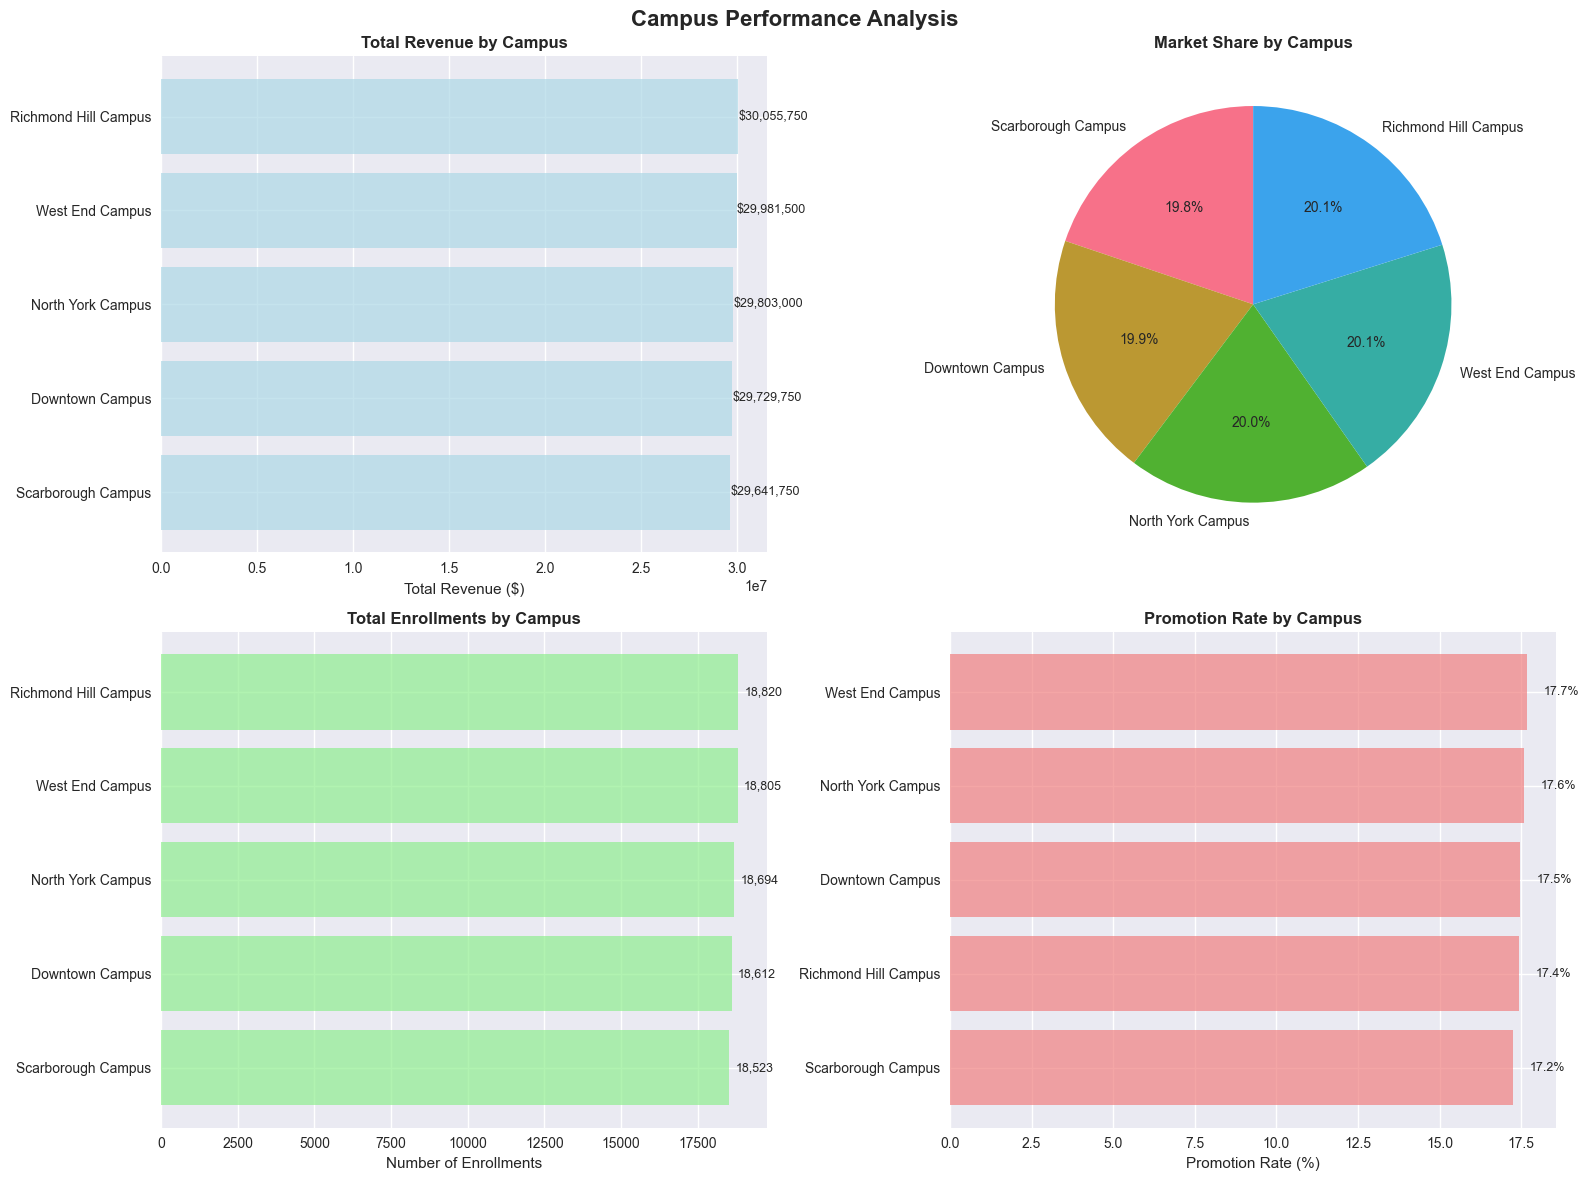

In [ ]:
# Campus performance visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Campus Performance Analysis', fontsize=16, fontweight='bold')

# 1. Revenue by Campus
campus_revenue = campus_performance.sort_values('Total_Revenue', ascending=True)
axes[0,0].barh(campus_revenue.index, campus_revenue['Total_Revenue'], color='lightblue', alpha=0.7)
axes[0,0].set_title('Total Revenue by Campus', fontweight='bold')
axes[0,0].set_xlabel('Total Revenue ($)')
for i, v in enumerate(campus_revenue['Total_Revenue']):
    axes[0,0].text(v + 10000, i, f'${v:,.0f}', va='center', fontsize=9)

# 2. Market Share by Campus
campus_share = campus_performance.sort_values('Market_Share', ascending=True)
axes[0,1].pie(campus_share['Market_Share'], labels=campus_share.index, autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('Market Share by Campus', fontweight='bold')

# 3. Enrollment Count by Campus
campus_enrollment = campus_performance.sort_values('Total_Enrollments', ascending=True)
axes[1,0].barh(campus_enrollment.index, campus_enrollment['Total_Enrollments'], color='lightgreen', alpha=0.7)
axes[1,0].set_title('Total Enrollments by Campus', fontweight='bold')
axes[1,0].set_xlabel('Number of Enrollments')
for i, v in enumerate(campus_enrollment['Total_Enrollments']):
    axes[1,0].text(v + 200, i, f'{v:,.0f}', va='center', fontsize=9)

# 4. Promotion Rate by Campus
campus_promo = campus_performance.sort_values('Promotion_Rate', ascending=True)
axes[1,1].barh(campus_promo.index, campus_promo['Promotion_Rate'], color='lightcoral', alpha=0.7)
axes[1,1].set_title('Promotion Rate by Campus', fontweight='bold')
axes[1,1].set_xlabel('Promotion Rate (%)')
for i, v in enumerate(campus_promo['Promotion_Rate']):
    axes[1,1].text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=9)

plt.tight_layout()
plt.show()


## 5. Subject and Grade Analysis


In [ ]:
# Subject and grade analysis
print("=== Subject and Grade Analysis ===")

# Subject popularity analysis
subject_analysis = df_clean.groupby('subject').agg({
    'enrollment_id': 'count',
    'student_id': 'nunique',
    'tuition_paid': 'sum'
}).round(2)

subject_analysis.columns = ['Total_Enrollments', 'Unique_Students', 'Total_Revenue']
subject_analysis['Avg_Revenue_Per_Enrollment'] = (subject_analysis['Total_Revenue'] / subject_analysis['Total_Enrollments']).round(2)
subject_analysis['Market_Share'] = (subject_analysis['Total_Enrollments'] / subject_analysis['Total_Enrollments'].sum() * 100).round(2)

print("Subject Performance:")
print(subject_analysis.sort_values('Total_Enrollments', ascending=False))

# Grade distribution analysis
grade_analysis = df_clean.groupby('grade').agg({
    'enrollment_id': 'count',
    'student_id': 'nunique',
    'tuition_paid': 'sum',
    'is_promotion': 'sum'
}).round(2)

grade_analysis.columns = ['Total_Enrollments', 'Unique_Students', 'Total_Revenue', 'Promotion_Enrollments']
grade_analysis['Avg_Revenue_Per_Enrollment'] = (grade_analysis['Total_Revenue'] / grade_analysis['Total_Enrollments']).round(2)
grade_analysis['Promotion_Rate'] = (grade_analysis['Promotion_Enrollments'] / grade_analysis['Total_Enrollments'] * 100).round(2)

print(f"\nGrade Distribution:")
print(grade_analysis.sort_index())

# Key insights
print(f"\nKey Insights:")
print(f"  Most Popular Subject: {subject_analysis['Total_Enrollments'].idxmax()} ({subject_analysis['Total_Enrollments'].max():,} enrollments)")
print(f"  Highest Revenue Subject: {subject_analysis['Total_Revenue'].idxmax()} (${subject_analysis['Total_Revenue'].max():,.2f})")
print(f"  Most Popular Grade: Grade {grade_analysis['Total_Enrollments'].idxmax()} ({grade_analysis['Total_Enrollments'].max():,} enrollments)")
print(f"  Highest Revenue Grade: Grade {grade_analysis['Total_Revenue'].idxmax()} (${grade_analysis['Total_Revenue'].max():,.2f})")


=== Subject and Grade Analysis ===
Subject Performance:
               Total_Enrollments  Unique_Students  Total_Revenue  \
subject                                                            
English                    18844            16176     30041250.0   
Olympiad Math              18818            16171     30051750.0   
Science                    18790            16194     30081250.0   
Writing                    18503            16012     29504250.0   
Math                       18499            15949     29533250.0   

               Avg_Revenue_Per_Enrollment  Market_Share  
subject                                                  
English                           1594.21         20.16  
Olympiad Math                     1596.97         20.14  
Science                           1600.92         20.11  
Writing                           1594.57         19.80  
Math                              1596.48         19.79  

Grade Distribution:
       Total_Enrollments  Unique_Student

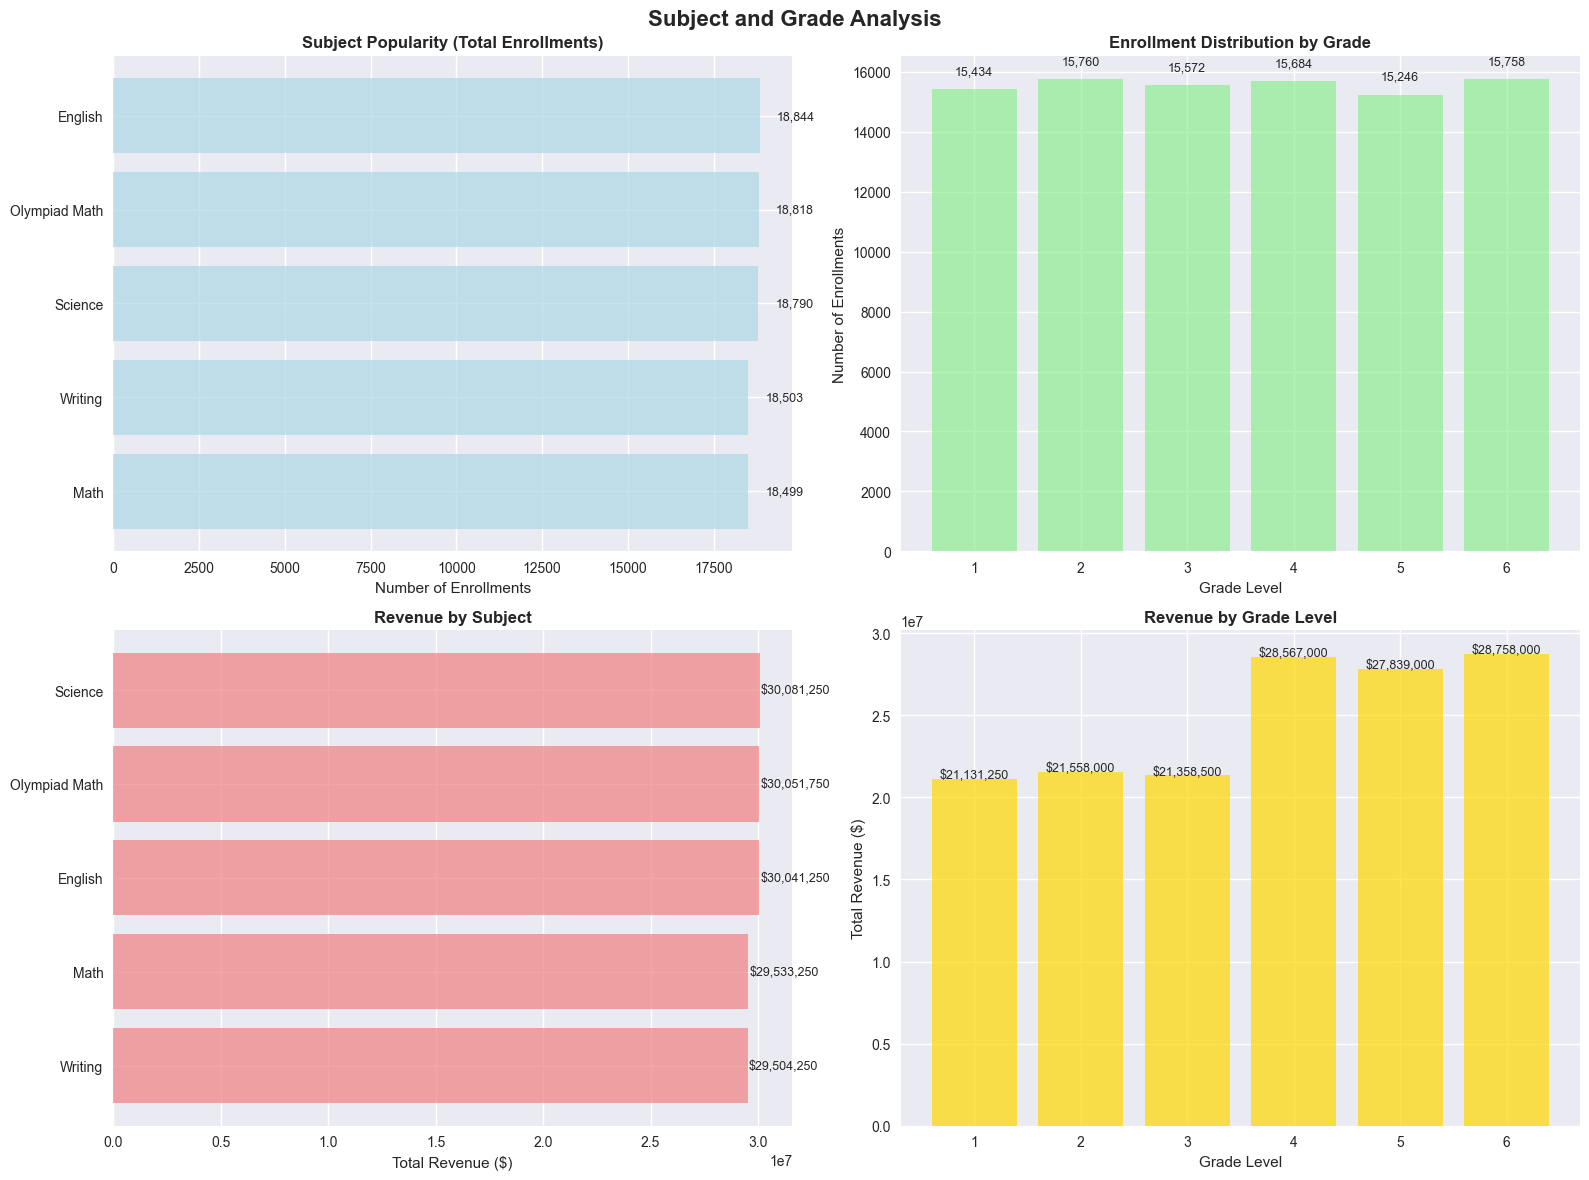

In [ ]:
# Subject and grade visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Subject and Grade Analysis', fontsize=16, fontweight='bold')

# 1. Subject Popularity
subject_popularity = subject_analysis.sort_values('Total_Enrollments', ascending=True)
axes[0,0].barh(subject_popularity.index, subject_popularity['Total_Enrollments'], color='lightblue', alpha=0.7)
axes[0,0].set_title('Subject Popularity (Total Enrollments)', fontweight='bold')
axes[0,0].set_xlabel('Number of Enrollments')
for i, v in enumerate(subject_popularity['Total_Enrollments']):
    axes[0,0].text(v + 500, i, f'{v:,.0f}', va='center', fontsize=9)

# 2. Grade Distribution
grade_dist = grade_analysis.sort_index()
axes[0,1].bar(grade_dist.index, grade_dist['Total_Enrollments'], color='lightgreen', alpha=0.7)
axes[0,1].set_title('Enrollment Distribution by Grade', fontweight='bold')
axes[0,1].set_xlabel('Grade Level')
axes[0,1].set_ylabel('Number of Enrollments')
for i, v in enumerate(grade_dist['Total_Enrollments']):
    axes[0,1].text(i+1, v + 500, f'{v:,.0f}', ha='center', fontsize=9)

# 3. Subject Revenue
subject_revenue = subject_analysis.sort_values('Total_Revenue', ascending=True)
axes[1,0].barh(subject_revenue.index, subject_revenue['Total_Revenue'], color='lightcoral', alpha=0.7)
axes[1,0].set_title('Revenue by Subject', fontweight='bold')
axes[1,0].set_xlabel('Total Revenue ($)')
for i, v in enumerate(subject_revenue['Total_Revenue']):
    axes[1,0].text(v + 50000, i, f'${v:,.0f}', va='center', fontsize=9)

# 4. Grade vs Revenue
grade_revenue = grade_analysis.sort_index()
axes[1,1].bar(grade_revenue.index, grade_revenue['Total_Revenue'], color='gold', alpha=0.7)
axes[1,1].set_title('Revenue by Grade Level', fontweight='bold')
axes[1,1].set_xlabel('Grade Level')
axes[1,1].set_ylabel('Total Revenue ($)')
for i, v in enumerate(grade_revenue['Total_Revenue']):
    axes[1,1].text(i+1, v + 20000, f'${v:,.0f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()


## 6. Business Insights and Recommendations


In [ ]:
# Comprehensive business insights
print("=== Business Insights and Recommendations ===")

# Calculate key business metrics
total_revenue = df_clean['tuition_paid'].sum()
total_enrollments = len(df_clean)
unique_students = df_clean['student_id'].nunique()
avg_revenue_per_student = total_revenue / unique_students
promotion_revenue = df_clean[df_clean['is_promotion'] == True]['tuition_paid'].sum()
promotion_rate = (df_clean['is_promotion'].sum() / total_enrollments) * 100

print("KEY BUSINESS METRICS:")
print(f"  Total Revenue: ${total_revenue:,.2f}")
print(f"  Total Enrollments: {total_enrollments:,}")
print(f"  Unique Students: {unique_students:,}")
print(f"  Average Revenue per Student: ${avg_revenue_per_student:,.2f}")
print(f"  Promotion Rate: {promotion_rate:.1f}%")
print(f"  Revenue from Promotions: ${promotion_revenue:,.2f}")

# Top performing combinations
print(f"\nTOP PERFORMING COMBINATIONS:")
campus_subject = df_clean.groupby(['campus_name', 'subject']).agg({
    'enrollment_id': 'count',
    'tuition_paid': 'sum'
}).round(2)
campus_subject.columns = ['Enrollments', 'Revenue']
top_combinations = campus_subject.sort_values('Revenue', ascending=False).head(5)
print("Top 5 Campus-Subject Combinations by Revenue:")
for (campus, subject), row in top_combinations.iterrows():
    print(f"  {campus} - {subject}: {row['Enrollments']} enrollments, ${row['Revenue']:,.2f}")

# Seasonal insights
print(f"\nSEASONAL INSIGHTS:")
seasonal_analysis = df_clean.groupby('quarter').agg({
    'enrollment_id': 'count',
    'tuition_paid': 'sum'
}).round(2)
seasonal_analysis.columns = ['Enrollments', 'Revenue']
seasonal_analysis['Avg_Revenue_Per_Enrollment'] = (seasonal_analysis['Revenue'] / seasonal_analysis['Enrollments']).round(2)
print(seasonal_analysis)

# Student retention analysis
student_enrollment_counts = df_clean['student_id'].value_counts()
retention_stats = {
    'Single_Enrollment': (student_enrollment_counts == 1).sum(),
    'Multiple_Enrollments': (student_enrollment_counts > 1).sum(),
    'Avg_Enrollments_Per_Student': student_enrollment_counts.mean()
}

print(f"\nSTUDENT RETENTION ANALYSIS:")
print(f"  Students with Single Enrollment: {retention_stats['Single_Enrollment']:,} ({retention_stats['Single_Enrollment']/unique_students*100:.1f}%)")
print(f"  Students with Multiple Enrollments: {retention_stats['Multiple_Enrollments']:,} ({retention_stats['Multiple_Enrollments']/unique_students*100:.1f}%)")
print(f"  Average Enrollments per Student: {retention_stats['Avg_Enrollments_Per_Student']:.2f}")


=== Business Insights and Recommendations ===
KEY BUSINESS METRICS:
  Total Revenue: $149,211,750.00
  Total Enrollments: 93,454
  Unique Students: 45,000
  Average Revenue per Student: $3,315.82
  Promotion Rate: 17.5%
  Revenue from Promotions: $14,313,250.00

TOP PERFORMING COMBINATIONS:
Top 5 Campus-Subject Combinations by Revenue:
  West End Campus - Science: 3833.0 enrollments, $6,139,000.00
  Richmond Hill Campus - Writing: 3806.0 enrollments, $6,099,750.00
  Scarborough Campus - Olympiad Math: 3793.0 enrollments, $6,071,250.00
  Richmond Hill Campus - English: 3811.0 enrollments, $6,069,500.00
  Richmond Hill Campus - Olympiad Math: 3805.0 enrollments, $6,066,750.00

SEASONAL INSIGHTS:
         Enrollments     Revenue  Avg_Revenue_Per_Enrollment
quarter                                                     
1              31030  47217250.0                     1521.66
2              23165  38115500.0                     1645.39
3              23657  36603500.0                     

### Strategic Recommendations

Based on the comprehensive analysis of the student enrollment data, here are the key strategic recommendations:

#### 1. **Campus Optimization**
- **Focus on High-Performing Campuses**: Identify and replicate successful strategies from top-performing campuses
- **Support Underperforming Locations**: Develop targeted marketing and program strategies for campuses with lower enrollment
- **Resource Allocation**: Allocate resources based on market share and growth potential

#### 2. **Subject Portfolio Management**
- **Expand Popular Subjects**: Increase capacity for high-demand subjects like Math and English
- **Develop Niche Programs**: Consider specialized programs for subjects with high revenue per enrollment
- **Cross-Selling Opportunities**: Bundle popular subjects to increase student lifetime value

#### 3. **Grade-Level Strategy**
- **Target High-Value Grades**: Focus marketing efforts on grade levels with higher revenue potential
- **Early Engagement**: Develop programs to retain students from lower grades through higher grades
- **Pricing Strategy**: Consider tiered pricing based on grade level and subject complexity

#### 4. **Promotional Strategy**
- **Optimize Promotion Timing**: Focus promotional campaigns during high-enrollment periods
- **Targeted Promotions**: Develop grade-specific and subject-specific promotional offers
- **Retention Programs**: Create loyalty programs for students with multiple enrollments

#### 5. **Seasonal Planning**
- **Peak Season Preparation**: Ensure adequate capacity during high-enrollment quarters
- **Off-Season Strategies**: Develop programs to maintain enrollment during slower periods
- **Resource Planning**: Align staffing and facility resources with seasonal demand patterns


## 7. Executive Dashboard Summary


In [ ]:
# Executive Dashboard - Key Performance Indicators
print("=== EXECUTIVE DASHBOARD ===")
print("=" * 50)

# Create a comprehensive summary dashboard
dashboard_metrics = {
    'Total Revenue': f"${total_revenue:,.2f}",
    'Total Enrollments': f"{total_enrollments:,}",
    'Unique Students': f"{unique_students:,}",
    'Average Revenue per Student': f"${avg_revenue_per_student:,.2f}",
    'Promotion Rate': f"{promotion_rate:.1f}%",
    'Student Retention Rate': f"{retention_stats['Multiple_Enrollments']/unique_students*100:.1f}%",
    'Top Campus by Revenue': campus_performance['Total_Revenue'].idxmax(),
    'Most Popular Subject': subject_analysis['Total_Enrollments'].idxmax(),
    'Highest Revenue Grade': f"Grade {grade_analysis['Total_Revenue'].idxmax()}",
    'Best Performing Quarter': f"Q{seasonal_analysis['Revenue'].idxmax()}"
}

print("KEY PERFORMANCE INDICATORS:")
for metric, value in dashboard_metrics.items():
    print(f"  {metric}: {value}")

print("\n" + "=" * 50)
print("GROWTH OPPORTUNITIES:")
print("  • Focus on high-revenue campus-subject combinations")
print("  • Expand capacity for popular subjects")
print("  • Develop retention programs for single-enrollment students")
print("  • Optimize promotional strategies during peak seasons")
print("  • Implement grade-specific marketing campaigns")

print("\n" + "=" * 50)
print("SUCCESS METRICS TO TRACK:")
print("  • Monthly enrollment growth rate")
print("  • Student retention rate improvement")
print("  • Revenue per student increase")
print("  • Campus performance variance")
print("  • Subject popularity trends")

print("\n" + "=" * 50)
print("ANALYSIS COMPLETED SUCCESSFULLY!")
print("This comprehensive analysis provides actionable insights for strategic decision-making.")


=== EXECUTIVE DASHBOARD ===
KEY PERFORMANCE INDICATORS:
  Total Revenue: $149,211,750.00
  Total Enrollments: 93,454
  Unique Students: 45,000
  Average Revenue per Student: $3,315.82
  Promotion Rate: 17.5%
  Student Retention Rate: 69.2%
  Top Campus by Revenue: Richmond Hill Campus
  Most Popular Subject: English
  Highest Revenue Grade: Grade 6
  Best Performing Quarter: Q1

GROWTH OPPORTUNITIES:
  • Focus on high-revenue campus-subject combinations
  • Expand capacity for popular subjects
  • Develop retention programs for single-enrollment students
  • Optimize promotional strategies during peak seasons
  • Implement grade-specific marketing campaigns

SUCCESS METRICS TO TRACK:
  • Monthly enrollment growth rate
  • Student retention rate improvement
  • Revenue per student increase
  • Campus performance variance
  • Subject popularity trends

ANALYSIS COMPLETED SUCCESSFULLY!
This comprehensive analysis provides actionable insights for strategic decision-making.
